# Image processing with scikit-image


- scikit-image is a collection of algorithms for image processing.


- It also contains several sample images in its database, which you can use freely.


- And it works with with numpy arrays, so you can handle images as arrays.


**References:**

https://scikit-image.org/

https://github.com/scikit-image/scikit-image

You need to install:

**conda install scikit-image**


And some optional dependencies:

**conda install pooch**

**conda install plotly**

## Image database:

The submodule data contains all kinds of images:

See a list here: https://scikit-image.org/docs/stable/api/skimage.data.html

In [2]:
import skimage
from skimage import data

import numpy as np
import matplotlib.pyplot as plt

In [3]:
coffee_image = data.coffee()

print(type(coffee_image))

print(coffee_image.shape)

<class 'numpy.ndarray'>
(400, 600, 3)


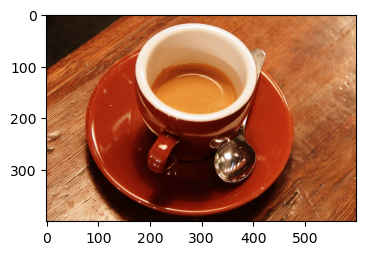

In [4]:
# Get a plot of the image
plt.figure(figsize=(4,3))

plt.imshow(coffee_image)

plt.show()

In [5]:
ast_image = data.astronaut()

print(type(ast_image))

print(ast_image.shape)

<class 'numpy.ndarray'>
(512, 512, 3)


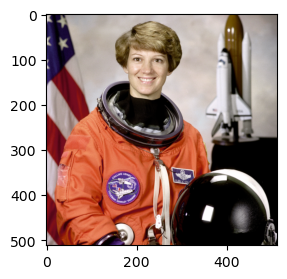

In [6]:
# Get a plot of the image
plt.figure(figsize=(4,3))

plt.imshow(ast_image)

plt.show()

In [7]:
hs_image = data.horse()

print(type(hs_image))

print(hs_image.shape)

<class 'numpy.ndarray'>
(328, 400)


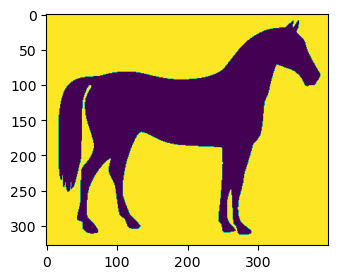

In [8]:
# Get a plot of the image
plt.figure(figsize=(4,3))

plt.imshow(hs_image )

plt.show()

In [9]:
# Get layers:
coffee_image_ch0 = coffee_image[:,:,0]
coffee_image_ch1 = coffee_image[:,:,1]
coffee_image_ch2 = coffee_image[:,:,2]

print(np.min(coffee_image_ch0), np.max(coffee_image_ch0))

0 255


In [11]:
ast_0 = ast_image[:,:,0]
ast_1 = ast_image[:,:,1]
ast_2 = ast_image[:,:,2]

print(np.min(ast_0), np.max(ast_0))

0 255


In [12]:
print(np.min(hs_image), np.max(hs_image))

False True


# Example: 

I copied the description from: https://scikit-image.org/docs/stable/api/skimage.data.html#skimage.data.cell

## Cell image

skimage.data.cell()

Cell floating in saline.

This is a quantitative phase image retrieved from a digital hologram using the Python library qpformat. The image shows a cell with high phase value, above the background phase.

Because of a banding pattern artifact in the background, this image is a good test of thresholding algorithms. **The pixel spacing is 0.107 µm.**

These data were part of a comparison between several refractive index retrieval techniques for spherical objects as part of [1].

This image is CC0, dedicated to the public domain. You may copy, modify, or distribute it without asking permission.


[1] Paul Müller, Mirjam Schürmann, Salvatore Girardo, Gheorghe Cojoc, and Jochen Guck. “Accurate evaluation of size and refractive index for spherical objects in quantitative phase imaging.” Optics Express 26(8): 10729-10743 (2018). DOI:10.1364/OE.26.010729

In [13]:
# Get the cell image
cell_image = data.cell()

print(type(cell_image), cell_image.shape)

<class 'numpy.ndarray'> (660, 550)


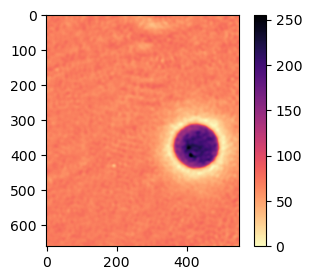

In [15]:
# Let's look at the image

fig, ax = plt.subplots(figsize=(4,3))

z = ax.imshow(cell_image, cmap = "magma_r")

plt.colorbar(z)

plt.show()

#### Basic analysis:

In [16]:
print("max. value is:", np.max(cell_image))
print("min. value is:", np.min(cell_image))

max. value is: 255
min. value is: 0


#### Pixel Intensity Histograms:

In [20]:
# Reshape arrays into a 1D vector:
cell_1d = np.reshape(cell_image, (cell_image.size, 1))

print(cell_1d.shape)

(363000, 1)


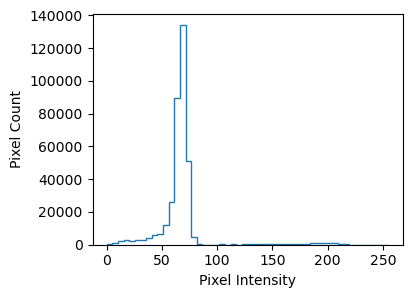

In [21]:
# Histogram plot:

plt.figure(figsize=(4,3))

plt.hist(cell_1d, histtype = "step", bins = 50)


plt.xlabel("Pixel Intensity")
plt.ylabel("Pixel Count")

plt.show()

## 1. Getting rid of the background

#### Array manipulation with conditionals:

##### Conditionals

#### Replace with NANs all the intensity values < 100.

We can use np.where(), see documentation: https://numpy.org/doc/stable/reference/generated/numpy.where.html

In [26]:
cell_1d_clean = np.where(cell_1d < 100, np.nan, cell_1d)

In [27]:
# Safe check:
print(cell_1d[0], cell_1d_clean[0])

[71] [nan]


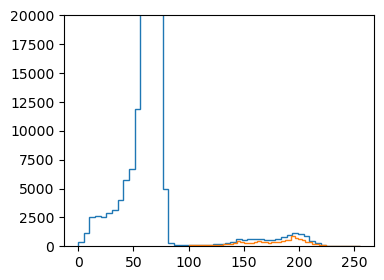

In [29]:
# Check Histogram:

plt.figure(figsize=(4,3))

plt.hist(cell_1d, histtype = "step", bins = 50)
plt.hist(cell_1d_clean, histtype = "step", bins = 50)


plt.ylim(0, 20000)
plt.show()

In [30]:
# Reshape back the result into a 2D array:

cell_image_clean = np.reshape(cell_1d_clean, cell_image.shape)

print(cell_image.shape, cell_image_clean.shape)

(660, 550) (660, 550)


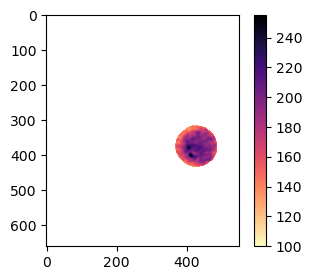

In [31]:
# Plot the resulting image without the background:

# Let's look at the image

fig, ax = plt.subplots(figsize=(4,3))

Z = ax.imshow(cell_image_clean, cmap = "magma_r")

plt.colorbar(Z)

plt.show()

In [32]:
print("max. value is:", np.nanmax(cell_image_clean))
print("min. value is:", np.nanmin(cell_image_clean))

max. value is: 255.0
min. value is: 100.0


#### Selecting subsets / subarrays

Since the cell is just occupying the space on the middle right, let's plot just that area.

In [28]:
# Check the array shape:

print(cell_image_clean.shape)

# Select a subset

cell_image_subset = cell_image_clean[300:450, 350:500]

print(cell_image_subset.shape)

(660, 550)
(150, 150)


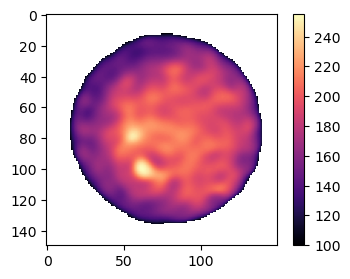

In [29]:
# Plot the resulting image without the background:

# Let's look at the image

fig, ax = plt.subplots(figsize=(4,3))

Z = ax.imshow(cell_image_subset, cmap = "magma")

plt.colorbar(Z)

plt.show()

### Indices of the maximum:

In [30]:
print(np.max(cell_image_subset))

print(np.nanmax(cell_image_subset))

nan
255.0


In [31]:
# Get indices of the maximum
idx_max = np.where(np.nanmax(cell_image_subset)\
                   ==cell_image_subset)

print(idx_max)

(array([100]), array([62]))


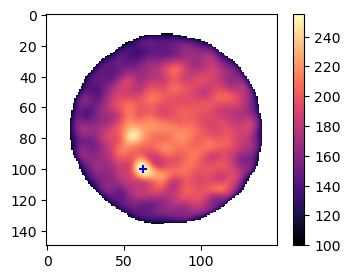

In [33]:

# Let's look at the image

fig, ax = plt.subplots(figsize=(4,3))

Z = ax.imshow(cell_image_subset, cmap = "magma")

ax.scatter(idx_max[1], idx_max[0], color = "blue",\
           marker= "+")

plt.colorbar(Z)

plt.show()

#### Local maxima:

Examples: https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_peak_local_max.html


Documentation: https://scikit-image.org/docs/stable/api/skimage.feature.html#skimage.feature.peak_local_max


In [34]:
from skimage.feature import peak_local_max
# Does not like NANs

In [35]:
print(cell_image_subset)

# Convert NANs to zeroes
np.nan_to_num(cell_image_subset, copy=False, nan = 0.)

print(cell_image_subset)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


#### Check unique elements in array

https://numpy.org/doc/stable/reference/generated/numpy.unique.html

In [36]:
np.unique(cell_image_subset)

array([  0., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 150., 151., 152., 153.,
       154., 155., 156., 157., 158., 159., 160., 161., 162., 163., 164.,
       165., 166., 167., 168., 169., 170., 171., 172., 173., 174., 175.,
       176., 177., 178., 179., 180., 181., 182., 183., 184., 185., 186.,
       187., 188., 189., 190., 191., 192., 193., 194., 195., 196., 197.,
       198., 199., 200., 201., 202., 203., 204., 205., 206., 207., 208.,
       209., 210., 211., 212., 213., 214., 215., 216., 217., 218., 219.,
       220., 221., 222., 223., 224., 225., 226., 227., 228., 229., 230.,
       231., 232., 233., 234., 235., 236., 237., 238., 239., 240., 241.,
       242., 243., 244., 245., 246., 247., 248., 24

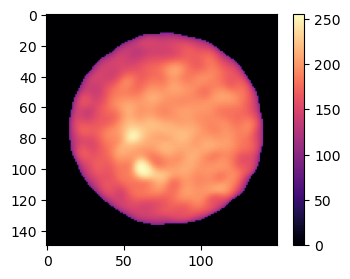

In [37]:
# Plot the resulting image without the background:

# Let's look at the image

fig, ax = plt.subplots(figsize=(4,3))

Z = ax.imshow(cell_image_subset, cmap = "magma")

plt.colorbar(Z)

plt.show()

In [38]:
# Get coordinates of the local maxima
coord_max = peak_local_max(cell_image_subset,\
                           min_distance = 1, num_peaks = 2)

print(type(coord_max))
print(coord_max)

<class 'numpy.ndarray'>
[[100  62]
 [ 78  56]]


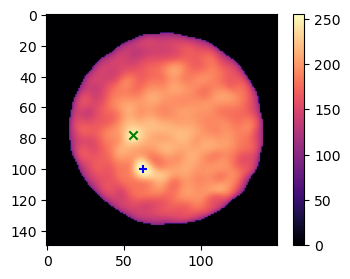

In [39]:
# Let's look at the image + maxima

fig, ax = plt.subplots(figsize=(4,3))

Z = ax.imshow(cell_image_subset, cmap = "magma")

ax.scatter(coord_max[0][1], coord_max[0][0], color = "blue",\
           marker= "+")
ax.scatter(coord_max[1][1], coord_max[1][0], color = "green",\
           marker= "x")

plt.colorbar(Z)

plt.show()

### Exercise: Calculate the distance between knots (in $\mu m$)

In [40]:
def distance_nuclei(peak1, peak2):
    """
    This function computes the distance in um 
    between two points
    Inputs: Coordinates
    Outputs: Distance
    """
    
    pixel_length = 0.107 # in micras/pixel
    
    distance = np.sqrt((peak1[1] - peak2[1])**2\
             + (peak1[0] - peak2[0])**2) # in pixels
    
    return distance*pixel_length # in micras

In [41]:
# Call the function:
dist =  distance_nuclei(coord_max[0], coord_max[1])

print("Distance in microns between peak 1 and peak 2 is:", dist)

Distance in microns between peak 1 and peak 2 is: 2.439975409712155


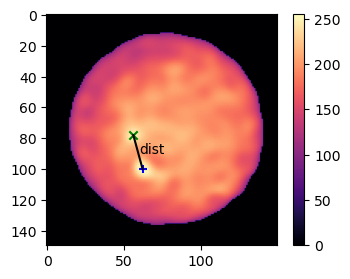

In [42]:
# Graphic of dist

fig, ax = plt.subplots(figsize=(4,3))

Z = ax.imshow(cell_image_subset, cmap = "magma")

ax.scatter(coord_max[0][1], coord_max[0][0], color = "blue",\
           marker= "+")
ax.scatter(coord_max[1][1], coord_max[1][0], color = "green",\
           marker= "x")
ax.plot([coord_max[0][1], coord_max[1][1]],\
        [coord_max[0][0], coord_max[1][0]], linestyle = "-",\
        color = "black")

plt.text(60, 90, "dist")

plt.colorbar(Z)

plt.show()

### Cell tagging:

You are generally interested in generating binary images (1, 0)

### Exercise: Isolate the areas around the knots (in $\mu m$)

In [49]:
# Let's use pixel information to generate a binary image(1,0)

cell_image_bin = np.where(cell_image_subset > 230, 1., 0.)

print(np.unique(cell_image_bin))


[0. 1.]


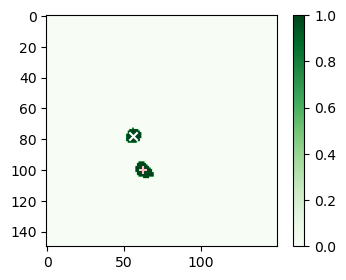

In [50]:
# Plot the resulting image without the background:

# Let's look at the image

fig, ax = plt.subplots(figsize=(4,3))

Z = ax.imshow(cell_image_bin, cmap = "Greens")
ax.scatter(coord_max[0][1], coord_max[0][0], color = "pink",\
           marker= "+")
ax.scatter(coord_max[1][1], coord_max[1][0], color = "white",\
           marker= "x")

plt.colorbar(Z)

plt.show()

# Exercise: 

Write a function to calculate the area occupied by the knots.

Remember that each pixel has a size $0.107\,\mu m$, so the pixel area is $(0.107)^2\,\mu m^2$.

In [51]:
def area_nuclei(binary_array):
    """
    This calculates the area of binary images.
    Input: image with 1, 0
    Outpus: total # of pixels, area in um
    """
    
    pixel_area = 0.107**2 # in units of micras^2
    
    number_pixels = np.sum(binary_array) # in pixels
    
    total_area = pixel_area * number_pixels # in micras^2
    
    return number_pixels, total_area

In [53]:
# Call our function:

a_pix, a_phy = area_nuclei(cell_image_bin)

print(a_pix, a_phy)

172.0 1.9692279999999998


In [54]:
print('Area in pixels =', a_pix, ', area in microns^2 =', a_phy)

Area in pixels = 172.0 , area in microns^2 = 1.9692279999999998
